### Import relevant packages

In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import time
from datetime import datetime
from datetime import timedelta
from datetime import date

In [2]:
response = requests.get("https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json")
dic = response.json()
df = pd.DataFrame(dic)                                        
df.head()

In [3]:
#df.to_csv("house_stock_watcher_api_data.csv")

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


In [4]:
names = df['representative'].value_counts().head(15)
names = list(names.index)
names.remove('Hon. Donna Shalala')
names.append("Hon. Nancy Pelosi")
names

['Hon. Josh Gottheimer',
 'Hon. Gilbert Cisneros',
 'Hon. Alan S. Lowenthal',
 'Hon. Susie Lee',
 'Hon. Donald Sternoff Beyer',
 'Hon. Dean Phillips',
 'Hon. Greg Gianforte',
 'Hon. Kevin Hern',
 'Hon. Michael T. McCaul',
 'Hon. Lois Frankel',
 'Hon. Kurt Schrader',
 'Hon. Mark Green',
 'Hon. Rohit Khanna',
 'Hon. Mark Dr Green',
 'Hon. Nancy Pelosi']

In [5]:
ticks = df['ticker'].value_counts().head(11)
ticks = list(ticks.index)
ticks.remove('--')
ticks

['MSFT', 'AAPL', 'NTAP', 'TDDXX', 'FB', 'BRK.B', 'AMZN', 'RUN', 'TSLA', 'NVDA']

In [6]:
df = df[df['representative'].isin(names)]
df = df[df['ticker'].isin(ticks)]

df

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
53,2020,04/28/2020,2020-03-16,self,BRK.B,Berkshire Hathaway Inc. New,sale_full,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False
68,2021,03/23/2021,2021-03-11,self,NVDA,NVIDIA Corporation,purchase,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False
100,2021,02/25/2021,2021-01-15,self,FB,Facebook Inc,purchase,"$100,001 - $250,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
134,2021,02/25/2021,2021-01-15,dependent,FB,Facebook Inc,purchase,"$100,001 - $250,000",Hon. Michael T. McCaul,TX10,https://disclosures-clerk.house.gov/public_dis...,False
264,2021,01/07/2021,2020-12-22,joint,BRK.B,Berkshire Hathaway Class B,purchase,"$1,001 - $15,000",Hon. Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14462,2020,06/10/2020,2020-05-18,None,AMZN,"Amazon.com, Inc.",sale_full,"$50,001 - $100,000",Hon. Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False
14464,2020,06/10/2020,2020-05-18,None,AAPL,Apple Inc.,sale_full,"$15,001 - $50,000",Hon. Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False
14481,2020,06/10/2020,2020-05-18,None,MSFT,Microsoft Corporation,sale_full,"$15,001 - $50,000",Hon. Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False
14482,2020,06/10/2020,2020-05-15,joint,MSFT,Microsoft Corporation,sale_partial,"$1,001 - $15,000",Hon. Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False


In [7]:
recent_transactions_df = df[['representative',
                             'transaction_date',                        
                             'ticker',
                             'owner',
                             'asset_description',
                             'amount',
                             'type']]

recent_transactions_df = recent_transactions_df.sort_values(by = ['representative', 'transaction_date'])
#recent_transactions_df.head(120)
#recent_transactions_df.to_csv('recent_transactions.csv', index=False)
recent_transactions_df["representative"].value_counts()

Hon. Josh Gottheimer          170
Hon. Donald Sternoff Beyer    140
Hon. Alan S. Lowenthal        113
Hon. Nancy Pelosi              28
Hon. Gilbert Cisneros          22
Hon. Michael T. McCaul         22
Hon. Kevin Hern                17
Hon. Kurt Schrader             17
Hon. Dean Phillips             13
Hon. Rohit Khanna              12
Name: representative, dtype: int64

In [10]:
#Nancy_pelosi = df[df['representative'] == "Hon. Nancy Pelosi"]
#Nancy_pelosi[Nancy_pelosi['amount'] == '$1,000,001 - $5,000,000'].head()

In [11]:
'''
purch_dates = df[df["type"]=="purchase"].groupby(['transaction_date', 'ticker']).size().reset_index(name="freq")
purch_dates = purch_dates[purch_dates["ticker"]!="--"].reset_index(drop=True)
purch_dates
'''

'\npurch_dates = df[df["type"]=="purchase"].groupby([\'transaction_date\', \'ticker\']).size().reset_index(name="freq")\npurch_dates = purch_dates[purch_dates["ticker"]!="--"].reset_index(drop=True)\npurch_dates\n'

In [12]:
'''
for i in range(len(purch_dates)):
    date_time_obj = datetime.strptime(purch_dates.loc[i,'transaction_date'], '%Y-%m-%d')
    NextDay_date  = date_time_obj + timedelta(days=1)
    his1mon_date  = date_time_obj - timedelta(days=30)
    his3mon_date  = date_time_obj - timedelta(days=90)
    his6mon_date  = date_time_obj - timedelta(days=180)
    his9mon_date  = date_time_obj - timedelta(days=270)
    his12mon_date = date_time_obj - timedelta(days=365)
    purch_dates.loc[i, "trans_date"]    = date_time_obj
    purch_dates.loc[i, "next_date"]     = NextDay_date
    purch_dates.loc[i, "his1mon_date"]  = his1mon_date
    purch_dates.loc[i, "his3mon_date"]  = his3mon_date
    purch_dates.loc[i, "his6mon_date"]  = his6mon_date
    purch_dates.loc[i, "his9mon_date"]  = his9mon_date
    purch_dates.loc[i, "his12mon_date"] = his12mon_date
    
    his1mon_date_nxt  = date_time_obj - timedelta(days=29)
    his3mon_date_nxt  = date_time_obj - timedelta(days=89)
    his6mon_date_nxt  = date_time_obj - timedelta(days=179)
    his9mon_date_nxt  = date_time_obj - timedelta(days=269)
    his12mon_date_nxt = date_time_obj - timedelta(days=364)
    
    purch_dates.loc[i, "his1mon_date_nxt"]  = his1mon_date_nxt
    purch_dates.loc[i, "his3mon_date_nxt"]  = his3mon_date_nxt
    purch_dates.loc[i, "his6mon_date_nxt"]  = his6mon_date_nxt
    purch_dates.loc[i, "his9mon_date_nxt"]  = his9mon_date_nxt
    purch_dates.loc[i, "his12mon_date_nxt"] = his12mon_date_nxt

    
purch_dates
'''

'\nfor i in range(len(purch_dates)):\n    date_time_obj = datetime.strptime(purch_dates.loc[i,\'transaction_date\'], \'%Y-%m-%d\')\n    NextDay_date  = date_time_obj + timedelta(days=1)\n    his1mon_date  = date_time_obj - timedelta(days=30)\n    his3mon_date  = date_time_obj - timedelta(days=90)\n    his6mon_date  = date_time_obj - timedelta(days=180)\n    his9mon_date  = date_time_obj - timedelta(days=270)\n    his12mon_date = date_time_obj - timedelta(days=365)\n    purch_dates.loc[i, "trans_date"]    = date_time_obj\n    purch_dates.loc[i, "next_date"]     = NextDay_date\n    purch_dates.loc[i, "his1mon_date"]  = his1mon_date\n    purch_dates.loc[i, "his3mon_date"]  = his3mon_date\n    purch_dates.loc[i, "his6mon_date"]  = his6mon_date\n    purch_dates.loc[i, "his9mon_date"]  = his9mon_date\n    purch_dates.loc[i, "his12mon_date"] = his12mon_date\n    \n    his1mon_date_nxt  = date_time_obj - timedelta(days=29)\n    his3mon_date_nxt  = date_time_obj - timedelta(days=89)\n    his6mo

In [13]:
'''
day_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=purch_dates.loc[i,"trans_date"],
                         end  =purch_dates.loc[i,"next_date"])
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"transaction_date"]],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"transaction_date"]],
                            "price":[np.nan]})
    day_price = pd.concat([day_price,row], axis = 0)
'''
#day_price.to_csv("day_price.csv")

'\nday_price = pd.DataFrame(columns=["ticker", "date","price"])\n\nfor i in range(len(purch_dates)):\n    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])\n    time.sleep(0.5)\n    val = ticker.history(start=purch_dates.loc[i,"trans_date"],\n                         end  =purch_dates.loc[i,"next_date"])\n    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")\n    try:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"transaction_date"]],\n                            "price":[val["Close"].values[0]]})\n    except:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"transaction_date"]],\n                            "price":[np.nan]})\n    day_price = pd.concat([day_price,row], axis = 0)\n'

In [14]:
'''
current_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=date.today().strftime("%Y-%m-%d"))
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[date.today().strftime("%Y-%m-%d")],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[date.today().strftime("%Y-%m-%d")],
                            "price":[np.nan]})
    current_price = pd.concat([current_price,row], axis = 0)
'''
#current_price.to_csv("current_price.csv")    

'\ncurrent_price = pd.DataFrame(columns=["ticker", "date","price"])\n\nfor i in range(len(purch_dates)):\n    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])\n    time.sleep(0.5)\n    val = ticker.history(start=date.today().strftime("%Y-%m-%d"))\n    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")\n    try:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[date.today().strftime("%Y-%m-%d")],\n                            "price":[val["Close"].values[0]]})\n    except:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[date.today().strftime("%Y-%m-%d")],\n                            "price":[np.nan]})\n    current_price = pd.concat([current_price,row], axis = 0)\n'

In [15]:
'''
his1_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=purch_dates.loc[i,"his1mon_date"],
                         end  =purch_dates.loc[i,"his1mon_date_nxt"])
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"his1mon_date"]],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"his1mon_date"]],
                            "price":[np.nan]})
    his1_price = pd.concat([his1_price,row], axis = 0)
'''

'\nhis1_price = pd.DataFrame(columns=["ticker", "date","price"])\n\nfor i in range(len(purch_dates)):\n    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])\n    time.sleep(0.5)\n    val = ticker.history(start=purch_dates.loc[i,"his1mon_date"],\n                         end  =purch_dates.loc[i,"his1mon_date_nxt"])\n    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")\n    try:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"his1mon_date"]],\n                            "price":[val["Close"].values[0]]})\n    except:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"his1mon_date"]],\n                            "price":[np.nan]})\n    his1_price = pd.concat([his1_price,row], axis = 0)\n'

### Add columns and modify the df for classification

In [8]:
day_price = pd.read_csv("./../../data/external/transact_price.csv")
day_price = day_price.drop_duplicates()
day_price = day_price[['ticker','date','price']]

current_price = pd.read_csv("./../../data/external/current_price.csv")
current_price = current_price.drop_duplicates()
current_price = current_price[['ticker','date','price']]
current_price['date'] = current_price['date'].replace(['2022-04-06'],'2022-04-07')

In [9]:
#Add transaction day stock-price
new_df = pd.merge(df, 
                  day_price[~np.isnan(day_price["price"])],
                  how='inner', 
                  left_on=['ticker','transaction_date'],
                  right_on = ['ticker','date'])

new_df = new_df.rename(columns={'price': 'trans_price'})

#Add current stock-price
new_df = pd.merge(new_df, 
                  current_price[~np.isnan(current_price["price"])],
                  how='inner', 
                  left_on=['ticker'],
                  right_on = ['ticker'])

new_df = new_df.rename(columns={'price': 'current_price'})

#Add Flag for response (if current price > trans_day_price)
new_df['response'] = new_df['current_price'] > new_df['trans_price']

#Filter for only purchase transactions
#new_df = new_df[new_df["type"]=="purchase"]

#Drop unnecessary columns
new_df = new_df.drop(columns=['transaction_date',
                              'disclosure_date',
                              'disclosure_year',
                              'cap_gains_over_200_usd',
                              'asset_description',
                              'ptr_link',
                              'date_x',
                              'date_y',
                              'district',
                              'current_price'])

#Create 1-hot-encoded columns
new_df = pd.get_dummies(new_df, drop_first=True)

#Remove duplicates
new_df = new_df.drop_duplicates()

#new_df.to_csv("full_data_raw.csv")    

In [10]:
new_df.columns = new_df.columns.str.replace("representative_Hon. ", "", regex=False)
new_df.columns = new_df.columns.str.replace("representative_Mr. ", "",regex=False)


new_df.columns = new_df.columns.str.replace("$1,001 - $15,000", "2",regex=False)
new_df.columns = new_df.columns.str.replace("$1,001 -", "1",regex=False)
new_df.columns = new_df.columns.str.replace("$100,001 - $250,000", "3",regex=False)
new_df.columns = new_df.columns.str.replace("$15,001 - $50,000", "4",regex=False)
new_df.columns = new_df.columns.str.replace("$250,001 - $500,000", "5",regex=False)
new_df.columns = new_df.columns.str.replace("$5,000,001 - $25,000,000", "6",regex=False)
new_df.columns = new_df.columns.str.replace("$50,001 - $100,000", "7",regex=False)
new_df.columns = new_df.columns.str.replace("$500,001 - $1,000,000", "8",regex=False)

new_df.columns = new_df.columns.str.replace(".", "",regex=False)
new_df.columns = new_df.columns.str.replace(" ", "_",regex=False)

for i in range(len(new_df.columns)): print(i, new_df.columns[i])

0 trans_price
1 response
2 owner_dependent
3 owner_joint
4 owner_self
5 ticker_AMZN
6 ticker_FB
7 ticker_MSFT
8 ticker_NTAP
9 ticker_NVDA
10 ticker_RUN
11 ticker_TSLA
12 type_sale_full
13 type_sale_partial
14 amount_1
15 amount_2
16 amount_3
17 amount_4
18 amount_5
19 amount_6
20 amount_7
21 amount_8
22 Dean_Phillips
23 Donald_Sternoff_Beyer
24 Gilbert_Cisneros
25 Josh_Gottheimer
26 Kevin_Hern
27 Kurt_Schrader
28 Michael_T_McCaul
29 Nancy_Pelosi
30 Rohit_Khanna


In [38]:
d = "Hon. Josh Gottheimer".replace("representative_Hon. ", "").replace("representative_Mr. ", "")
d.replace(".", "").replace(" ", "_")

'Hon_Josh_Gottheimer'

In [44]:
df = pd.DataFrame({'a':[4,5,3]})
df = df.reset_index()
df = df.rename(columns={'index':'id'})
df

,id,a
0,0,4
1,1,5
2,2,3


In [11]:
new_df.shape

(193, 31)

In [12]:
new_df.head()

,trans_price,response,owner_dependent,owner_joint,owner_self,ticker_AMZN,ticker_FB,ticker_MSFT,ticker_NTAP,ticker_NVDA,...,amount_8,Dean_Phillips,Donald_Sternoff_Beyer,Gilbert_Cisneros,Josh_Gottheimer,Kevin_Hern,Kurt_Schrader,Michael_T_McCaul,Nancy_Pelosi,Rohit_Khanna
0,129.844284,True,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,126.341751,True,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,130.616272,True,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,130.616272,True,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,130.616272,True,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Build model for classification

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X,y = new_df.drop(columns=['response']), 1*new_df['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=29)

#clf = RandomForestClassifier(max_depth=10, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=5000)
#clf  = tree.DecisionTreeClassifier(max_depth=8)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
print("Train set accuracy:", accuracy_score(y_train, train_pred))

y_pred = clf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

check = clf.predict_proba(X_test)
check[0][1]
#print(check[11], y_pred[11])
#print(X_train.iloc[11])


Train set accuracy: 0.8786127167630058
Test set accuracy: 0.85


0.7803660399960073

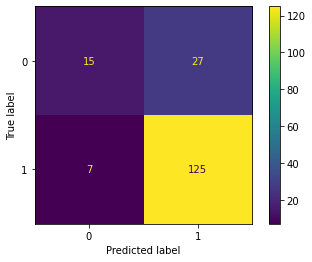

In [22]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

/Users/narin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


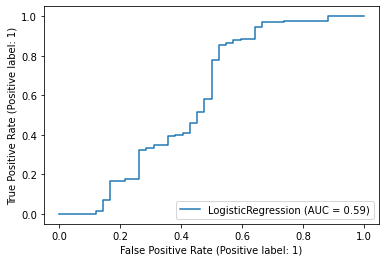

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(clf, X_test, y_test) 

In [24]:
pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef']) 

,features,coef
0,trans_price,[0.001644855855311249]
1,owner_dependent,[-0.38134607948611426]
2,owner_joint,[0.2747203742309174]
3,owner_self,[-0.08430303913969182]
4,ticker_AMZN,[0.0592994193069617]
5,ticker_FB,[-0.7228731615485516]
6,ticker_MSFT,[0.4251801739055817]
7,ticker_NTAP,[0.0]
8,ticker_NVDA,[0.21992187578922748]
9,ticker_RUN,[-0.3998987876788174]


In [25]:
clf.intercept_

array([0.39835279])

In [26]:
#Feature Imp - Only for RF and DT
"""
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(8,8))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()
"""

"\nfeatures = X_train.columns\nimportances = clf.feature_importances_\nindices = np.argsort(importances)\n\n# customized number \nnum_features = 10 \n\nplt.figure(figsize=(8,8))\nplt.title('Feature Importances')\n\n# only plot the customized number of features\nplt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')\nplt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])\nplt.xlabel('Relative Importance')\nplt.show()\n"